## 作業
在鐵達尼資料集中，   
可以用今天範例中提到的三種辨識異常值的方法，  
以 training data 為資料集。  
1.觀察票價是否有異常值的現象?  
2.你覺得找出的異常是真的異常? 你覺得需要做處理嗎?  
(試著講出自己的想法。)  


### 資料
鐵達尼號 train 資料集


In [1]:
# library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn  as sns
from scipy import stats
import math
import statistics
#讓圖可以在 jupyter notebook顯示
%matplotlib inline

In [7]:
df_train = pd.read_csv("Titanic_train.csv")

### 探索性分析:
*  觀察-是否有異常值  
我們來觀察一下 Fare 變數吧!!

In [8]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Q1:觀察票價是否有異常值的現象?

Fare平均 32.2042079685746
Fare標準差 49.693428597180905


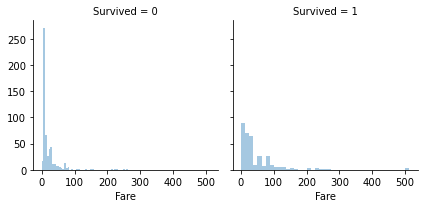

In [10]:
print("Fare平均",df_train['Fare'].mean())
print("Fare標準差",df_train['Fare'].std())

g = sns.FacetGrid(df_train, col = 'Survived')
g.map(sns.distplot,'Fare',kde=False)

## 方法1
* 進行一個描述性的統計（規定範圍），從而檢視哪些值是不合理的（範圍以外的值）。  


In [9]:
print(df_train['Fare'].describe())

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


## 方法 2
* 進行3倍標準差原則的計算，從而檢視哪些值是可疑的異常值。  


In [11]:
#ys:資料,times幾倍標準差
def outlier_z(ys,times):
    mean_y = np.mean(ys)
    std_y = np.std(ys)
    z_scores = [(y-mean_y) / std_y for y in ys]
    return np.where(np.abs(z_scores) > times) ##where符合條件，回傳。  ##np.abs按元素計算絕對值

out_index = outlier_z(df_train['Fare'],3) ##自定義函數，前面是資料，後面是幾倍標準差
print(out_index[0])
print("What Z-score's Outlier ?")
print(df_train.loc[out_index[0],'Fare'])

[ 27  88 118 258 299 311 341 377 380 438 527 557 679 689 700 716 730 737
 742 779]
What Z-score's Outlier ?
27     263.0000
88     263.0000
118    247.5208
258    512.3292
299    247.5208
311    262.3750
341    263.0000
377    211.5000
380    227.5250
438    263.0000
527    221.7792
557    227.5250
679    512.3292
689    211.3375
700    227.5250
716    227.5250
730    211.3375
737    512.3292
742    262.3750
779    211.3375
Name: Fare, dtype: float64


## 方法3-盒鬚圖判別法(IQR method)

In [12]:
## ys：資料，times：盒鬚圖中的 d 
def outlier_iqr(ys,times):
    ##指定軸計算數據的第 q 個百分位數，同時忽略 nan 值。
    quartitle_1,quartitle_3 = np.nanpercentile(ys,[25,75]) 
    iqr = quartitle_3 - quartitle_1
    lower = quartitle_1 - (iqr * times)
    upper = quartitle_3 + (iqr * times)
    return np.where((ys < lower ) | (ys > upper))

out_index2 = outlier_iqr(df_train['Fare'],1.5) ## d 通常取1.5
print(out_index2)
print("What IQR's outlier ?(1.5IQR)")
print(df_train.loc[out_index2[0],'Fare'])

(array([  1,  27,  31,  34,  52,  61,  62,  72,  88, 102, 118, 120, 124,
       139, 151, 159, 180, 195, 201, 215, 218, 224, 230, 245, 256, 257,
       258, 262, 268, 269, 275, 290, 291, 297, 299, 305, 306, 307, 310,
       311, 318, 319, 324, 325, 332, 334, 336, 337, 341, 366, 369, 373,
       375, 377, 380, 385, 390, 393, 412, 435, 438, 445, 453, 484, 486,
       496, 498, 504, 505, 520, 527, 537, 540, 544, 550, 557, 558, 581,
       585, 587, 591, 609, 627, 641, 645, 655, 659, 660, 665, 679, 681,
       689, 698, 700, 708, 716, 730, 737, 741, 742, 745, 759, 763, 765,
       779, 789, 792, 802, 820, 829, 835, 846, 849, 856, 863, 879],
      dtype=int64),)
What IQR's outlier ?(1.5IQR)
1       71.2833
27     263.0000
31     146.5208
34      82.1708
52      76.7292
         ...   
846     69.5500
849     89.1042
856    164.8667
863     69.5500
879     83.1583
Name: Fare, Length: 116, dtype: float64


In [13]:
# 看2倍試試
out_index3 = outlier_iqr(df_train['Fare'],2) 
print(out_index3)
print("What IQR's outlier ?(2IQR)")
print(df_train.loc[out_index3[0],'Fare'])

(array([ 27,  31,  34,  61,  62,  88, 102, 118, 124, 139, 195, 215, 224,
       230, 245, 256, 257, 258, 262, 268, 269, 275, 290, 291, 297, 299,
       305, 306, 307, 310, 311, 318, 319, 325, 332, 334, 337, 341, 373,
       375, 377, 380, 390, 393, 412, 435, 438, 445, 453, 484, 486, 496,
       498, 504, 505, 520, 527, 537, 544, 550, 557, 558, 581, 585, 587,
       591, 609, 627, 659, 660, 679, 689, 698, 700, 708, 716, 730, 737,
       741, 742, 759, 763, 765, 779, 789, 802, 820, 829, 835, 849, 856,
       879], dtype=int64),)
What IQR's outlier ?(2IQR)
27     263.0000
31     146.5208
34      82.1708
61      80.0000
62      83.4750
         ...   
829     80.0000
835     83.1583
849     89.1042
856    164.8667
879     83.1583
Name: Fare, Length: 92, dtype: float64


In [27]:
o1 = out_index
o2 = out_index2
o3 = out_index3
print("3倍標準差，異常直個數：",np.size(o1))
print("盒鬚圖，1.5 IQR：",np.size(o2))
print("盒鬚圖，2 IQR：",np.size(o3))


3倍標準差，異常直個數： 20
盒鬚圖，1.5 IQR： 116
盒鬚圖，2 IQR： 92


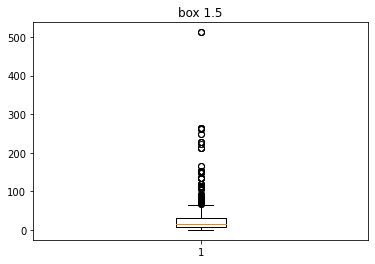

In [15]:
##畫圖
## np.isnana(data)，逐步找出資料中的遺失值，然後逐位反轉，讓遺失值為 0,則可以透過索引的方式，濾掉遺失值。
## whis ： 原本boxplot參數，可以設定IQR倍數
plt.boxplot(df_train['Fare'][~np.isnan(df_train['Fare'])],whis = 1.5) 
plt.title('box 1.5')
plt.show()

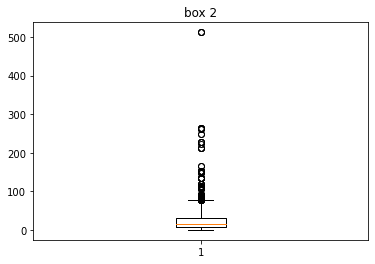

In [16]:
plt.boxplot(df_train['Fare'][~np.isnan(df_train['Fare'])],whis = 2) 
plt.title('box 2')
plt.show()

## Q2:你覺得找出的異常是真的異常? 你覺得需要做處理嗎?


不一定是真的異常，畢竟先以票價來說，不同船艙等級，票價高低不同。
再以分析出來的數據來看，有891筆數據，有異常的資料筆數，總括而言，算100多筆資料，以離群值來看較多一點，感覺不是真的異常。
而用盒鬚圖看，不論是1.5、2倍數的數值，都接近於票價為0的情況，感覺蠻符合現實，票價低的比較買得起，因此也比較多人，
而以上整理出來的離群值的數據等級較高，因此買的人較少，反而反映出真實的情況。